In [105]:
import numpy as np
import MITgcmutils

path_grid = "ECCO2/LLC270/ECCO-Darwin_extension/grid"
path_3d = "ECCO2/LLC270/ECCO-Darwin_extension/budget/average_DIC_3d"
path_2d = "ECCO2/LLC270/ECCO-Darwin_extension/budget/average_2d"

#### Variable list

In [38]:
fldList_3d = ['TRAC01  ','ADVxTr01','ADVyTr01','ADVrTr01','DFxETr01','DFyETr01','DFrETr01',
              'DFrITr01','gDAR01  ','cDIC    ','cDIC_PIC','respDIC ','rDIC_DOC','rDIC_POC','dDIC_PIC']
fldList_2d = ['ETAN    ','oceFWflx','SFLUX   ','TFLUX   ','oceSPflx','oceQsw  ','fluxCO2 ','gDICsurf',
           'gDICEpr ','gALKEpr ','gNO3Epr ','gNO2Epr ','gNH4Epr ','gO2Epr  ','gPO4Epr ','gFeTEpr ','gSiO2Epr']

mapping_3d = list(zip(range(len(fldList_3d)),fldList_3d))
mapping_2d = list(zip(range(len(fldList_2d)),fldList_2d))

variable_selection_2d = [6,8]
variable_selection_3d = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14]


# display(mapping_3d)
# print()
# display(mapping_2d)

variable_names = [mapping_3d[idx][1] for idx in variable_selection_3d] + [mapping_2d[idx][1] for idx in variable_selection_2d]

#### importing data

In [39]:
d_2 = MITgcmutils.mds.rdmds(f"{path_2d}/average_2d.0000002232",rec=variable_selection_2d)
d_3 = MITgcmutils.mds.rdmds(f"{path_3d}/average_DIC_3d.0000002232",rec=variable_selection_3d)

# getting the grid details
depth_c = MITgcmutils.mds.rdmds(f"{path_grid}/RC")
depth_f = MITgcmutils.mds.rdmds(f"{path_grid}/RF")
lat = MITgcmutils.mds.rdmds(f"{path_grid}/XC")
long = MITgcmutils.mds.rdmds(f"{path_grid}/YC")

#### Flatten 3d data

In [40]:
# Calculating delta depth
delta_depth_c = np.diff(depth_c, axis=0) * -1
delta_depth_c = delta_depth_c[:,0,0]

delta_depth_f = np.diff(depth_f, axis=0) * -1
delta_depth_f = delta_depth_f[:,0,0]

# getting index of top 100m depth
idx_top_100m = np.where(depth_c>=-100)[0]

In [41]:
# Using numpy
delta_depth_f_vec = delta_depth_f[idx_top_100m, np.newaxis, np.newaxis]
flattened_d3 = np.sum(delta_depth_f_vec * d_3[:,idx_top_100m,:,:], axis=1)/100 # Compressing the depth into 2D for top 100m

In [146]:
# Using loop
flattened_d3_test = np.zeros([13, 3510, 270])

for variable in range(d_3.shape[0]):
    for idx,delta_depth in enumerate(delta_depth_f[idx_top_100m]):
        flattened_d3_test[variable,:,:] += d_3[variable,idx,:,:] * delta_depth

flattened_d3_test = flattened_d3_test/100
print(flattened_d3_test.shape)

(13, 3510, 270)


#### Combine variables

In [7]:
combined_data = np.concatenate((flattened_d3, d_2), axis=0)
combined_data.shape

(15, 3510, 270)

#### plotting

In [ ]:
lat_flattened = lat.flatten()
long_flattened = long.flatten()

# Create a single figure with 7 rows and 2 columns
fig, axes = plt.subplots(8, 2, figsize=(20, 35))  # Adjust figsize for clarity
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate through all variables
for var_idx, var_name in enumerate(variable_names):
    ax = axes[var_idx]
    values = combined_data[var_idx].flatten()  # Color values for the current variable

    # Scatter plot for the current variable
    scatter = ax.scatter(lat_flattened, long_flattened, c=values, cmap='viridis', s=5, alpha=0.8)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(var_name)

    # Add labels and title
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_title(f'{var_name}')
    
plt.show()

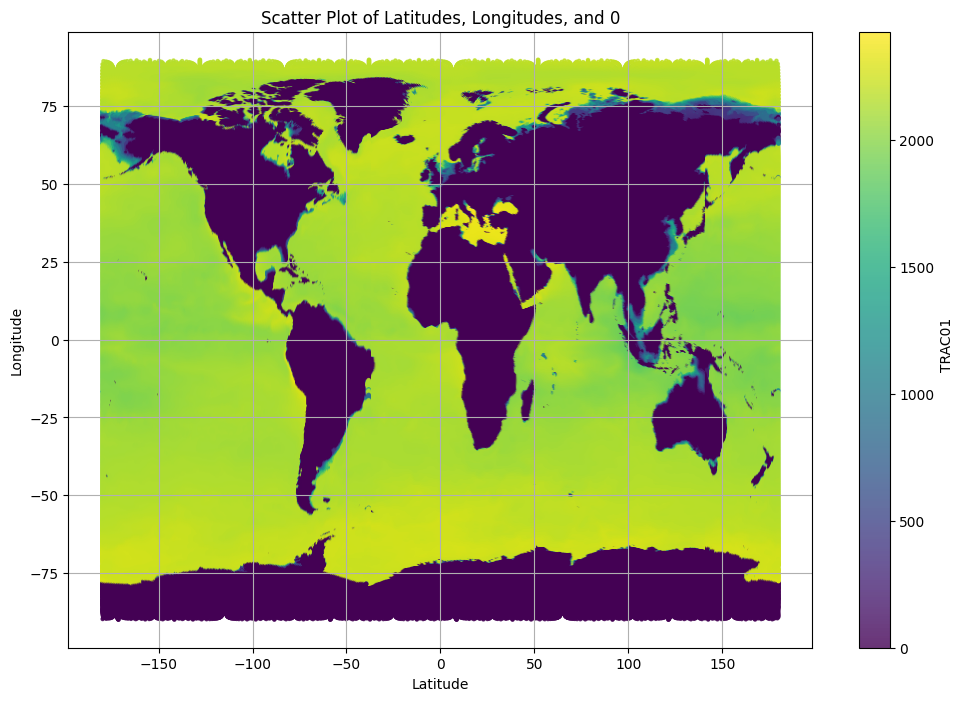

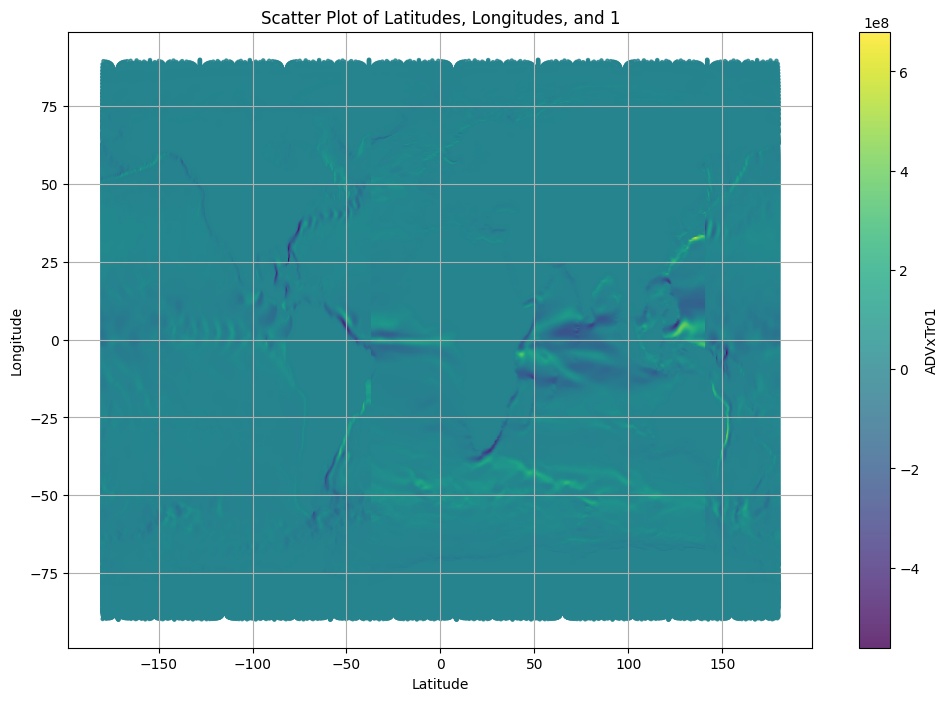

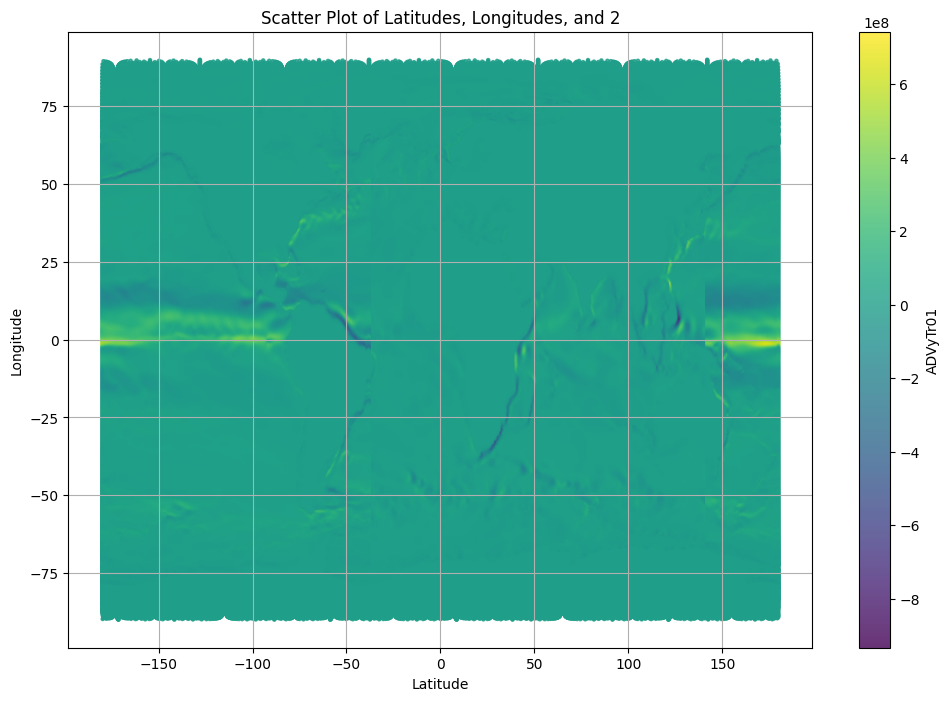

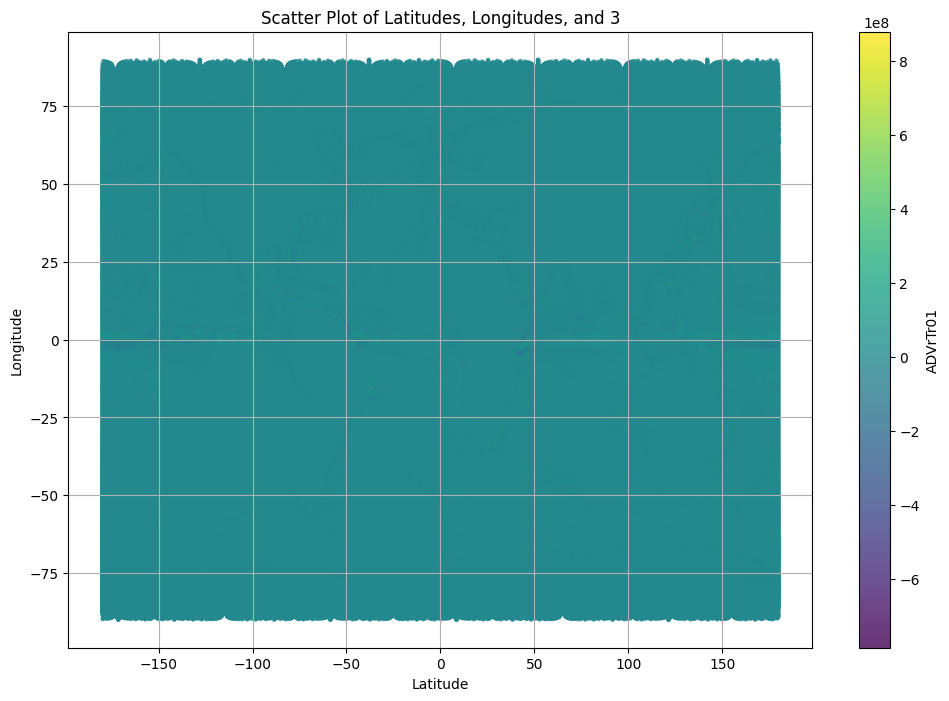

In [117]:
# Flatten lat, long, and d_3[0][0] to align for scatter plotting
lat_flattened = lat.flatten()
long_flattened = long.flatten()

for var_idx,var_name in enumerate(variable_names):
    values = combined_data[var_idx].flatten()  # Color values

    # Create the scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(lat_flattened, long_flattened, c=values, cmap='viridis', s=5, alpha=0.8)

    # Add a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label(var_name)

    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'Scatter Plot of Latitudes, Longitudes, and {var_name}')
    plt.grid()
    plt.show()
    
    if var_idx==3: break

In [93]:
print("latitudes:")
display(np.where((lat>=19.99)&(long<=20.01)))
# print("longitudes:")
# display(np.where((long>=19.9)&(long<=20.044)))

latitudes:


(array([   0,    0,    0, ..., 2231, 2231, 2231]),
 array([ 40,  41,  42, ..., 106, 107, 108]))

In [112]:
x,y = 561,174
print(long[x,y],lat[x,y],d_3[0][0][x][y])

20.043834686279297 20.16666603088379 0.0


In [84]:
lat[26,80]

19.999975204467773

In [96]:
long_index, lat_index = np.unravel_index(
    np.argmin((XC - 20)**2 + (YC - 20)**2),
    XC.shape
)
long_index, lat_index

(1, 0)

In [88]:
d_3[0][0].shape

(3510, 270)

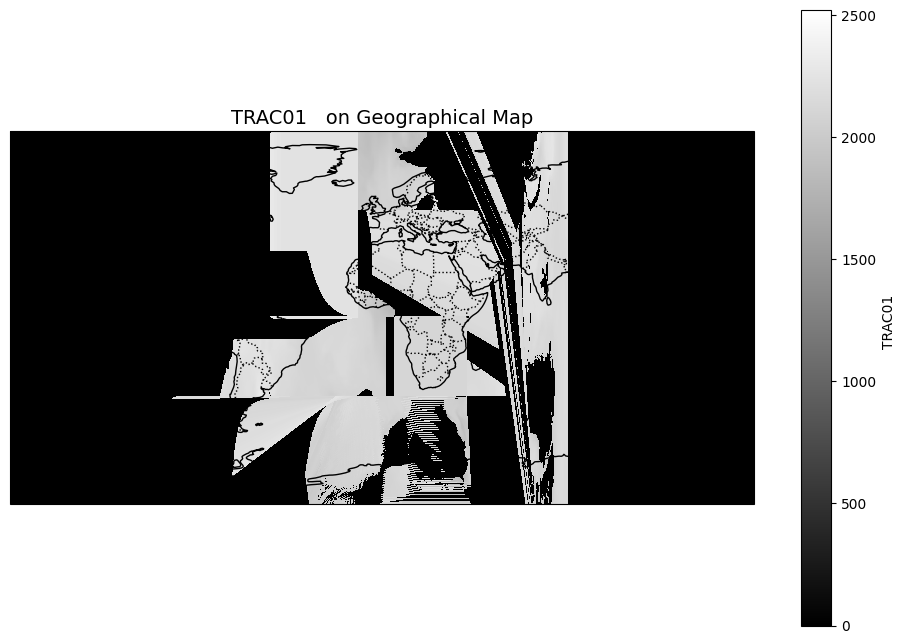

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with Cartopy's PlateCarree projection (latitude/longitude)
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and optional features
ax.coastlines(resolution='110m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot TRAC01 values
mesh = ax.pcolormesh(long, lat, d_3[0][0], cmap='grey', shading='auto', transform=ccrs.PlateCarree())
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05, label=f"{variable_names[0]}")

# Add labels and title
plt.title(f"{variable_names[0]} on Geographical Map", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

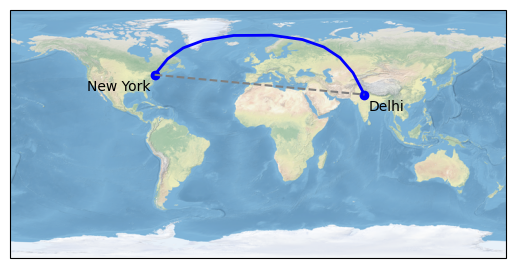

In [113]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

#### Excel Test

In [58]:
delta_depth_c = d_3[1]
variable_1_flattened = variable_1_data.reshape(variable_1_data.shape[0], -1)  # Shape: (50, 949770)

# Combine delta depth values with the flattened data
combined_data = np.column_stack((delta_depth_f, variable_1_flattened))

# Convert to DataFrame for better Excel formatting
column_names = ['Delta Depth'] + [f'Value_{i}' for i in range(variable_1_flattened.shape[1])]
df_excel = pd.DataFrame(combined_data, columns=column_names).T

# Save to Excel
excel_path = "variable_1_depth_comparison.xlsx"
df_excel.to_excel(excel_path, index=False)


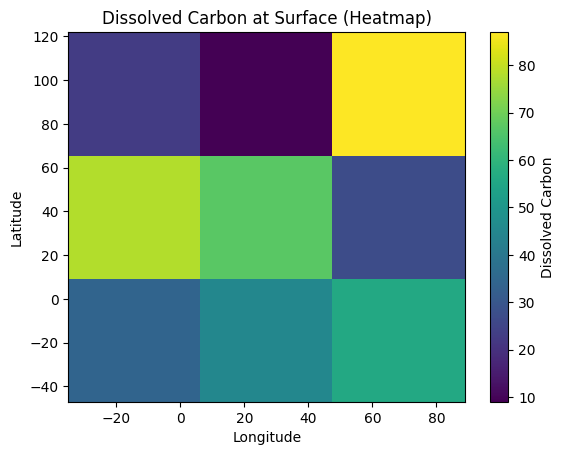

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
carbon = np.array([[34, 45, 56],
                   [78, 67, 27],
                   [23,  9, 87]])
XC = np.array([[ 87,  88,  89],
               [ 45,  46,  47],
               [-33, -34, -35]])
YC = np.array([[120, 121, 122],
               [-45, -46, -47],
               [ 74,  75,  76]])

# Flatten the arrays for plotting
carbon_flat = carbon.flatten()
XC_flat = XC.flatten()
YC_flat = YC.flatten()

plt.imshow(carbon, extent=[XC.min(), XC.max(), YC.min(), YC.max()],
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Dissolved Carbon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dissolved Carbon at Surface (Heatmap)')
plt.show()